C:\Users\KODI BANDS\AppData\Local\Temp\ipykernel_11652\1954857149.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\KODI BANDS\AppData\Local\Temp\ipykernel_11652\1954857149.py:46: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Date'].fillna(method='ffill', inplace=True)
C:\Users\KODI BANDS\AppData\Local\Temp\ipykernel_11652\1954857149.py:47: FutureWarning: A value is trying to 

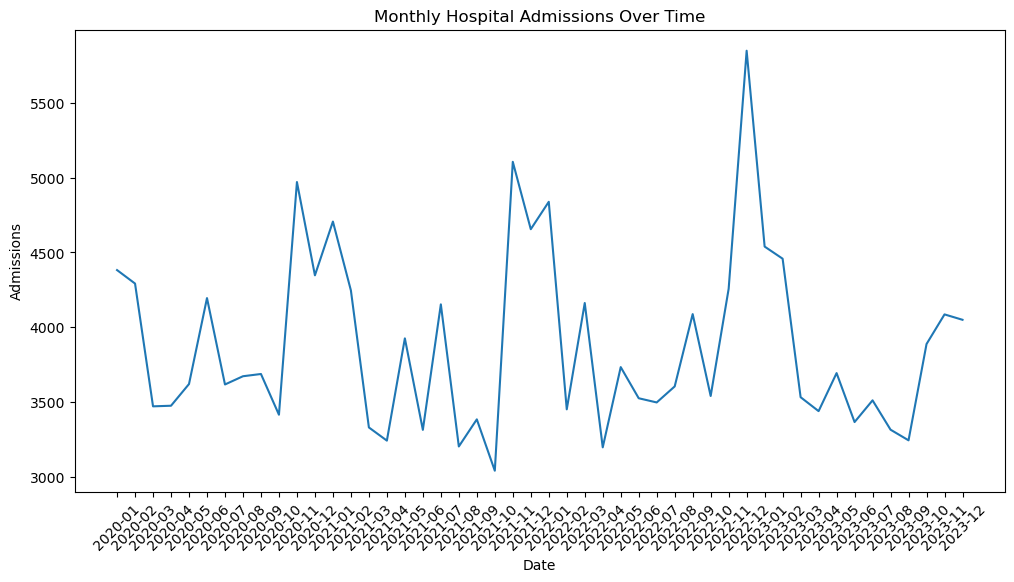

Admission rates per disease:
          Disease  Admissions
0  Cardiac Issues       35646
1        Diabetes       37380
2             Flu       39201
3      Infections       37290
4       Pneumonia       36818


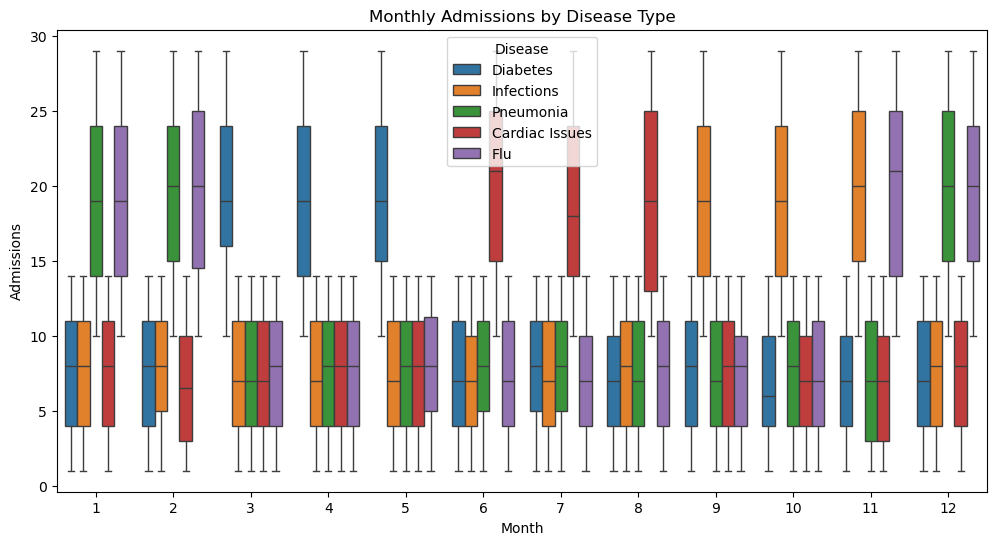

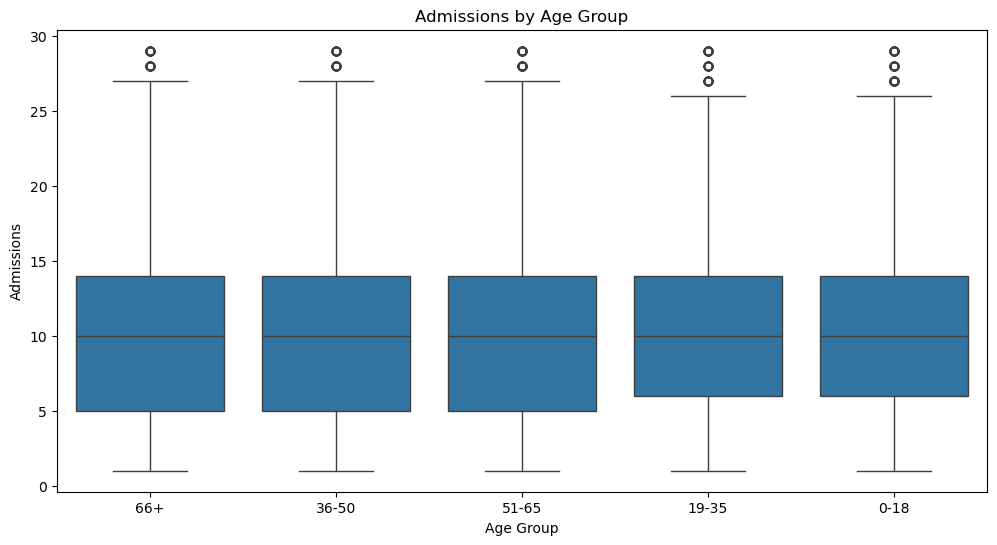

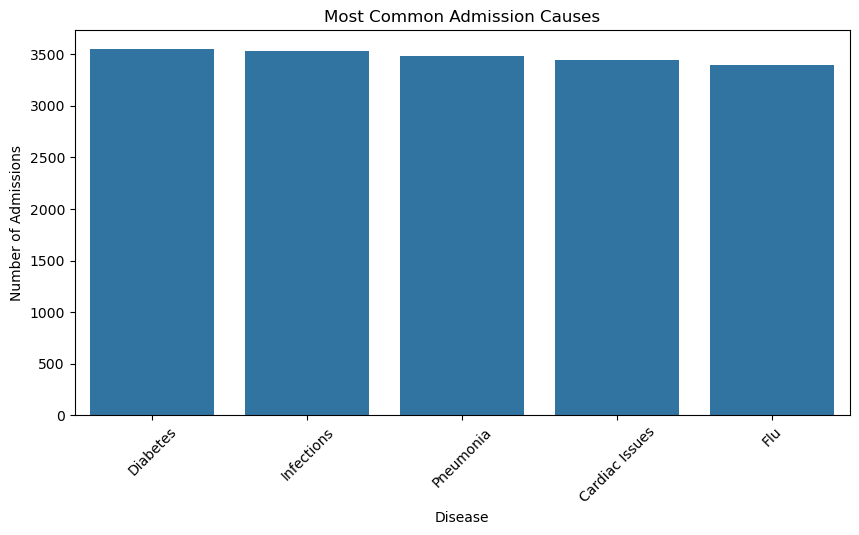

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generate synthetic dataset
np.random.seed(42)
dates = pd.date_range(start='2020-01-01', end='2023-12-31', freq='D')
num_entries = len(dates)

# Disease types and seasonal peaks
disease_types = ['Flu', 'Pneumonia', 'Cardiac Issues', 'Diabetes', 'Infections']
disease_seasonality = {
    'Flu': [1, 2, 11, 12],  # Peaks in winter
    'Pneumonia': [12, 1, 2],
    'Cardiac Issues': [6, 7, 8],  # Peaks in summer
    'Diabetes': [3, 4, 5],
    'Infections': [9, 10, 11]
}

# Age groups
age_groups = ['0-18', '19-35', '36-50', '51-65', '66+']

# Generate data
admissions = []
for date in dates:
    for _ in range(np.random.randint(5, 20)):
        disease = np.random.choice(disease_types)
        age_group = np.random.choice(age_groups + [np.nan])  # Introduce some missing age values
        month = date.month
        
        # Increase admissions during peak seasons
        if month in disease_seasonality[disease]:
            count = np.random.randint(10, 30)
        else:
            count = np.random.randint(1, 15)
        
        admissions.append([date, disease, age_group, count])

df = pd.DataFrame(admissions, columns=['Date', 'Disease', 'Age Group', 'Admissions'])

# Introduce some missing values in the Date column
df.loc[np.random.choice(df.index, size=50, replace=False), 'Date'] = pd.NaT

# Handle missing values
df['Date'].fillna(method='ffill', inplace=True)
df['Age Group'].fillna('Unknown', inplace=True)

# Save dataset
df.to_csv('hospital_admissions.csv', index=False)

# Load dataset
df = pd.read_csv('hospital_admissions.csv', parse_dates=['Date'])

# Time series analysis (seasonal peaks)
plt.figure(figsize=(12, 6))
df_monthly = df.groupby(df['Date'].dt.to_period('M'))['Admissions'].sum().reset_index()
df_monthly['Date'] = df_monthly['Date'].astype(str)  # Convert to string for plotting
sns.lineplot(data=df_monthly, x='Date', y='Admissions')
plt.title('Monthly Hospital Admissions Over Time')
plt.xticks(rotation=45)
plt.show()

# Statistical summarization: Admission rates per department
department_admissions = df.groupby('Disease')['Admissions'].sum().reset_index()
print("Admission rates per disease:")
print(department_admissions)

# Disease-based trends
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x=df['Date'].dt.month, y='Admissions', hue='Disease')
plt.title('Monthly Admissions by Disease Type')
plt.xlabel('Month')
plt.show()

# Age group trends
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Age Group', y='Admissions')
plt.title('Admissions by Age Group')
plt.show()

# Pattern detection: Common admission causes
disease_counts = df['Disease'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=disease_counts.index, y=disease_counts.values)
plt.xticks(rotation=45)
plt.title('Most Common Admission Causes')
plt.xlabel('Disease')
plt.ylabel('Number of Admissions')
plt.show()
